In [2]:
import numpy as np
arr1=np.array([[1,2,3,4],[4,5,6,7],[8,0,9,8]])
arr1.ndim
              

2

In [3]:
np.arange(30).reshape(5,6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

<BarContainer object of 4 artists>

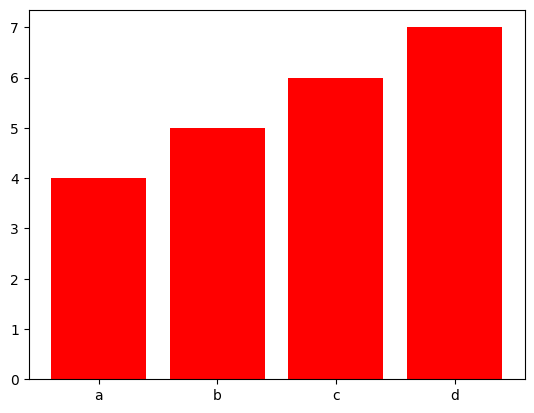

In [5]:
#barplot
cat=['a','b','c','d']
values=[4,5,6,7]
plt.bar(cat,values,color='red')

# OpenCV

In [6]:
import cv2
panda=cv2.imread("panda.jpg")

In [7]:
cv2.imshow("Panda",panda)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# writing images
image_new=panda+30
cv2.imwrite("./output.jpg",image_new)

True

In [9]:
cv2.imshow("new",image_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# DIsplaying video
import cv2
video=cv2.VideoCapture("./Hasan Raheem - Aisay Kaisay ft Abdullah Kasumbi.mp4")

In [ ]:
while True:
    ret,frame=video.read()
    if not ret:
        break
    cv2.imshow("video frames",frame)
    if cv2.waitKey(1)&0xFF==ord('q'):
        break

video.release()
cv2.destroyAllWindows()


In [10]:
panda_rgb=cv2.cvtColor(panda,cv2.COLOR_BGR2RGB)


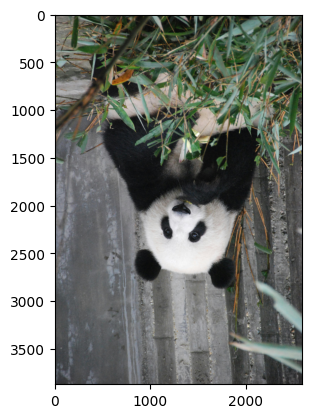

In [11]:
import matplotlib.pyplot as plt
plt.imshow(cv2.flip(panda_rgb,0)) #0,1,-1
vertical=cv2.flip(panda_rgb,0)

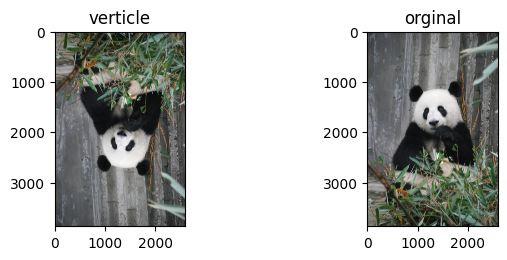

In [12]:
plt.Figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(vertical)
plt.title("verticle")
plt.subplot(2,2,2)
plt.imshow(panda_rgb)
plt.title("orginal")
plt.tight_layout()
plt.show()


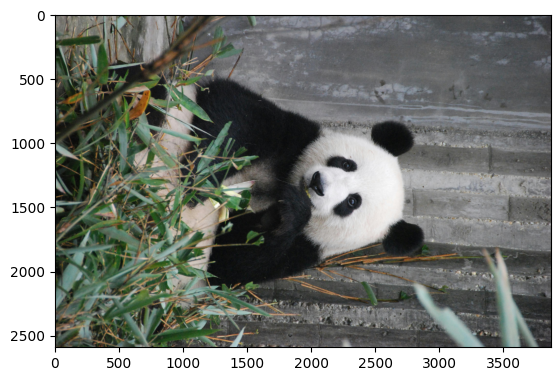

In [ ]:
rot_90=cv2.rotate(panda_rgb,cv2.ROTATE_90_CLOCKWISE)
plt.imshow(rot_90)

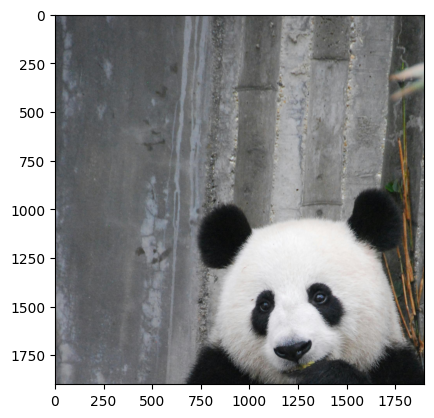

In [ ]:
x_start,y_start=100,100
x_end,y_end=2000,2000
cropped=panda_rgb[y_start:y_end,x_start:x_end]
plt.imshow(cropped)

In [ ]:
cropped.shape

(1900, 1900, 3)

## Resize

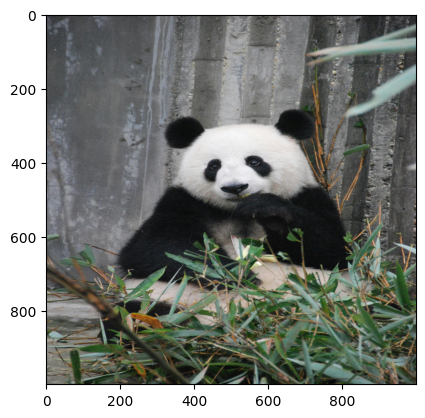

In [ ]:
new_h,new_w=1000,1000
resized_image=cv2.resize(panda_rgb,(new_w,new_h))
plt.imshow(resized_image)

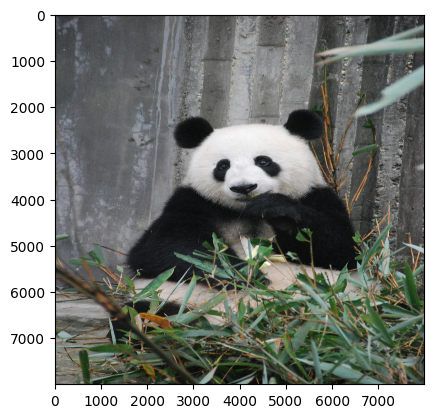

In [ ]:
# upscalling
new_h,new_w=8000,8000
upscalled=cv2.resize(panda_rgb,(new_w,new_h),interpolation=cv2.INTER_LANCZOS4) #linear,nearest cubic,bits,lanczosw4 are the algo for processing
plt.imshow(upscalled)

In [36]:
def Interpolation_complation(title,interpolation,height=1280,width=1390):
    print(interpolation)
    resized_near=cv2.resize(panda_rgb,(width,height),interpolation=interpolation)
    plt.imshow(resized_near)
    plt.title(f"Interpolation:{title}")
    plt.show()


In [27]:
x=[cv2.INTER_LINEAR,cv2.INTER_CUBIC,cv2.INTER_AREA,cv2.INTER_LANCZOS4]

In [31]:
x={"Linear":cv2.INTER_LINEAR,"Cubic":cv2.INTER_CUBIC,"AREA":cv2.INTER_AREA,"Lancoz":cv2.INTER_LANCZOS4}

In [33]:
for k,v in x.items():
    print(k,v)

Linear 1
Cubic 2
AREA 3
Lancoz 4


Linear
1


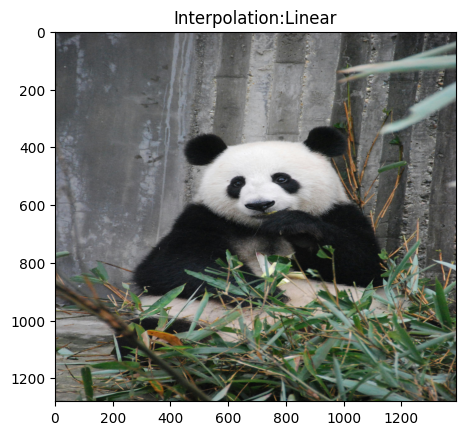

Cubic
2


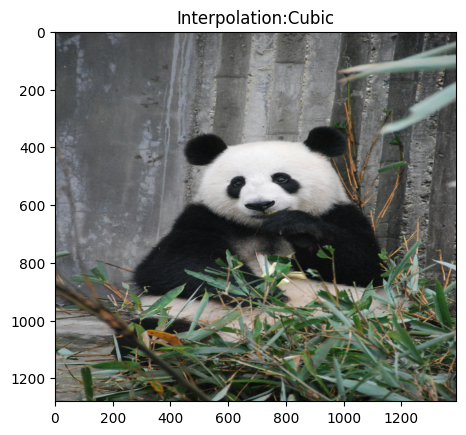

AREA
3


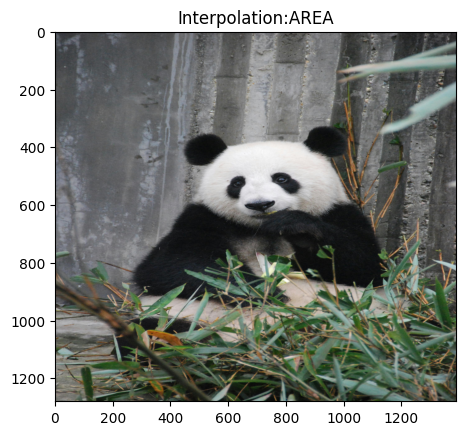

Lancoz
4


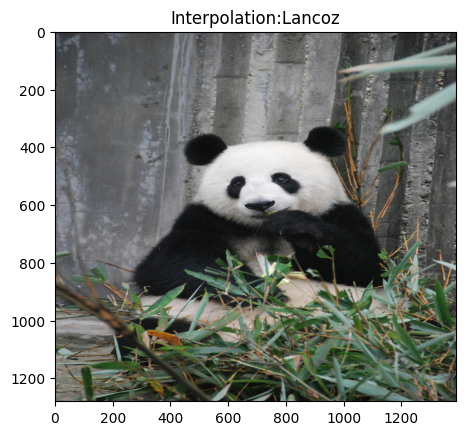

In [37]:
for k,v in x.items():
    print(k)
    Interpolation_complation(k,v)

In [ ]:
plt.Figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(vertical)
plt.title("verticle")
plt.subplot(2,2,2)
plt.imshow(panda_rgb)
plt.title("orginal")
plt.tight_layout()

# Kernals (Filters)

In [42]:
test_image=cv2.imread("./filters.png")

In [45]:
image_rgb=cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)

In [69]:
x=-15
horizontal_kernal=np.array([[-1,-1,-1],[x,x,x],[1,1,1]])
vertical_kernal=np.array([[-1,x,1],[-1,x,1],[-1,x,1]])
diagonal_kernal=np.array([[x,1,1],[-1,x,1],[-1,-1,x]])

In [70]:
def kernal_applier(kernal,image=image_rgb):
    filtered=cv2.filter2D(image_rgb,-1,kernal) #-1 such that output will be in same form
    return filtered

In [71]:
vertical=kernal_applier(vertical_kernal)
horizontal=kernal_applier(horizontal_kernal)
diagonal=kernal_applier(diagonal_kernal)

Text(0.5, 1.0, 'diagonal')

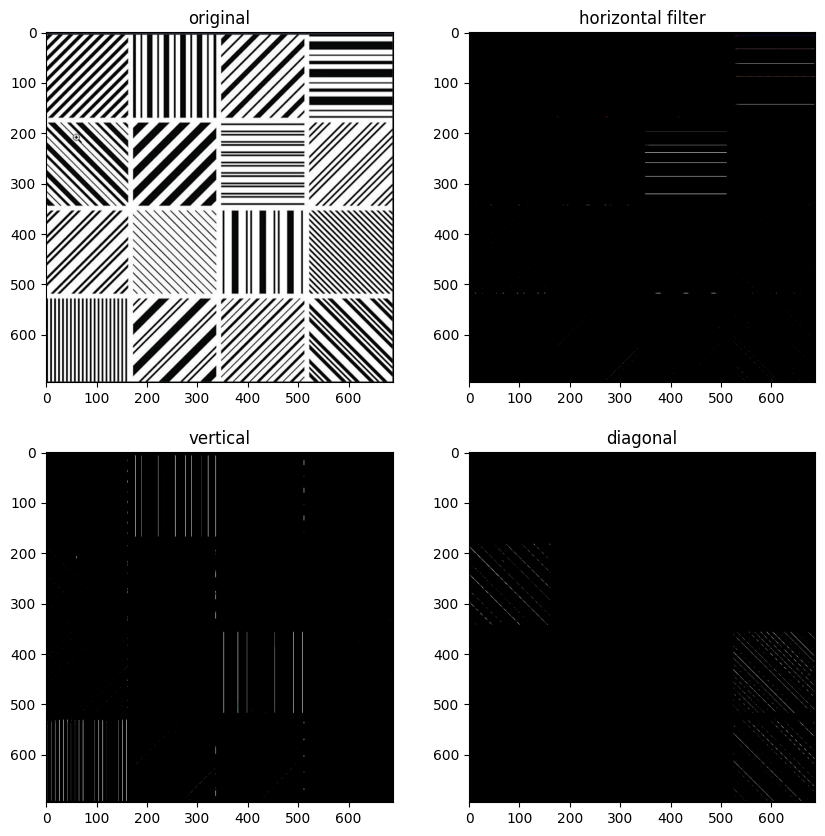

In [72]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(image_rgb,cmap='gray')
plt.title('original')
plt.subplot(2,2,2)
plt.imshow(horizontal,cmap='gray')
plt.title('horizontal filter')
plt.subplot(2,2,3)
plt.imshow(vertical,cmap='gray')
plt.title('vertical')
plt.subplot(2,2,4)
plt.imshow(diagonal,cmap='gray')
plt.title('diagonal')

# Blur

1.blur

2.Gaussian

3.Median

In [1]:
import cv2
import matplotlib.pyplot as plt

In [29]:
panda=cv2.imread("./panda.jpg")

In [7]:
panda_rgb=cv2.cvtColor(panda,cv2.COLOR_BGR2RGB)

In [10]:
def blur_applier(image,kernal_b,blurtype,format=cv2.COLOR_BGR2RGB):
    blur=blurtype(image,(kernal_b,kernal_b))
    blur=cv2.cvtColor(blur,format)
    return blur

In [18]:
panda_gray=cv2.cvtColor(panda,cv2.COLOR_BGR2GRAY)

In [20]:
normal_blur=blur_applier(panda_rgb,10,cv2.blur)
median_blur=cv2.medianBlur(panda_rgb,7)
gaussian_blur=cv2.GaussianBlur(panda_rgb,(11,11),0) #never use even ksize

normal_blur_gray=blur_applier(panda_gray,10,cv2.blur)
median_blur_gray=cv2.medianBlur(panda_gray,7)
gaussian_blur_gray=cv2.GaussianBlur(panda_gray,(11,11),0) #never use even ksize



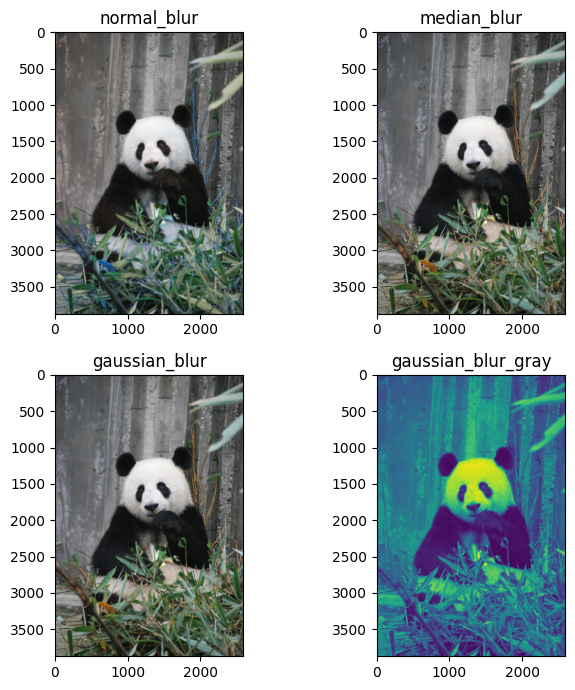

In [24]:
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
plt.imshow(normal_blur)
plt.title("normal_blur")
plt.subplot(2,2,2)
plt.imshow(median_blur)
plt.title("median_blur")
plt.subplot(2,2,3)
plt.imshow(gaussian_blur)
plt.title("gaussian_blur")

plt.subplot(2,2,4)
plt.imshow(normal_blur_gray)
plt.title("normal_blur_gray")
plt.subplot(2,2,4)
plt.imshow(median_blur_gray)
plt.title("median_blur_gray")
plt.subplot(2,2,4)
plt.imshow(gaussian_blur_gray)
plt.title("gaussian_blur_gray")
plt.tight_layout()
plt.show()

# Color Thresholding and Mask Creation

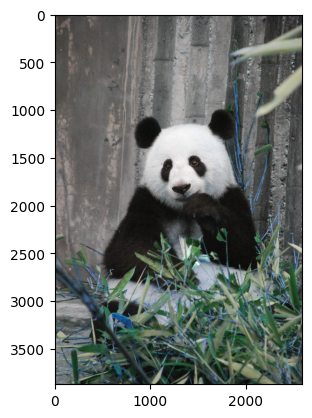

In [30]:
plt.imshow(panda)

In [31]:
# Convert the bgr image into hsv for color thresholding
panda_hsv=cv2.cvtColor(panda,cv2.COLOR_BGR2HSV)

In [71]:
import numpy as np
lower_white=np.array([0,0,0])
upper_white=np.array([50,165,100])

In [72]:
mask=cv2.inRange(panda_hsv,lower_white,upper_white)

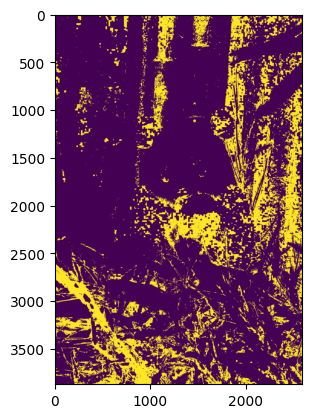

In [73]:
plt.imshow(mask)